# AIRPLANE_CRASHES AND FATALITIES SINCE_1908
URL:https://www.kaggle.com
obective:this dataset will be used to show Airplane crashes since 1908.it contains data about crashes and fatalities and operator by airline it will help us know the safest airline to use.

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import os

In [3]:
df=pd.read_csv("airline.zip")
df.head(5)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [75]:
#finding out null values
100*df.isnull().sum()

Date                 0
Time            221900
Location          2000
Operator          1800
Flight #        419900
Route           170600
Type              2700
Registration     33500
cn/In           122800
Aboard            2200
Fatalities        1200
Ground            2200
Summary          39000
dtype: int64

In [7]:
#dropping null values
df1=df.dropna()
df1

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
208,01/19/1930,18:23,"Oceanside, California",Maddux Airlines,7,"Aqua Caliente, Mexico - Los Angeles",Ford 5-AT-C Tri Motor,NC9689,5-AT-046,16.0,16.0,0.0,"While en route to Los Angeles, the pilot, flyi..."
236,03/31/1931,10:45,"Bazaar, Kansas",Trans Continental and Western Air,599,Kansas City - Wichita - Los Angeles,Fokker F10A Trimotor,NC-999,1063,8.0,8.0,0.0,"Shortly after taking off from Kansas City, one..."
334,08/31/1934,23:42,"Amazonia, Missouri",Rapid Air Transport,6,Omaha - St. Joseph,Stinson SM-6000B,NC10809,5004,5.0,5.0,0.0,The plane crashed about 11 miles from St. Jose...
354,05/06/1935,03:30,"Atlanta, Missouri",Trans Continental and Western Air,6,Los Angeles - Albuquerque - Kanasas City - Wa...,Douglas DC-2-112,NC13785,1295,14.0,5.0,0.0,The plane crashed while en route from Albuquer...
365,08/14/1935,23:45,"Near Gilmer, Texas",Delta Air Lines,4,Dallas - Atlanta,Stinson Model A,NC14599,9103,4.0,4.0,0.0,Crashed 3 miles south of Gilmer. The outboard ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5248,02/12/2009,22:17,"Clarence Center, New York",Continental Connection/Colgan Air,3407,"Newark, N.J. - Buffalo, NY",Bombardier DHC-8-402 Q400,N200WQ,4200,49.0,49.0,1.0,The commuter plane crashed while attemptiong t...
5251,02/25/2009,10:31,"Amsterdam, Netherlands",Turkish Airlines,1951,"Istanbul, Turkey - Amsterdam, Netherlands",Boeing 737-8F2,TC-JGE,29789/1065,134.0,9.0,0.0,The plane was on final approach to Runway 18R ...
5255,03/23/2009,06:48,"Tokyo, Japan",FedEx,80,"Guangzhou, China - Tokyo, Japan",McDonnell Douglas MD-11,N526FE,48600/560,2.0,2.0,0.0,The cargo plane crashed and burst into flame a...
5259,04/17/2009,10:30,"Mount Gergaji, Indonesia",Mimika Air,514,Ilaga - Mulia,Pilatus PC-6,PK-LTJ,959,11.0,11.0,0.0,The passenger plane crashed in poor weather in...


In [8]:
#finding out null values
df1.isnull().sum()

Date            0
Time            0
Location        0
Operator        0
Flight #        0
Route           0
Type            0
Registration    0
cn/In           0
Aboard          0
Fatalities      0
Ground          0
Summary         0
dtype: int64

In [10]:
#finding out duplicates
df1.duplicated().sum()

0

In [13]:
#dropping column
df2=df1.drop(columns="Summary")
df2

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground
208,01/19/1930,18:23,"Oceanside, California",Maddux Airlines,7,"Aqua Caliente, Mexico - Los Angeles",Ford 5-AT-C Tri Motor,NC9689,5-AT-046,16.0,16.0,0.0
236,03/31/1931,10:45,"Bazaar, Kansas",Trans Continental and Western Air,599,Kansas City - Wichita - Los Angeles,Fokker F10A Trimotor,NC-999,1063,8.0,8.0,0.0
334,08/31/1934,23:42,"Amazonia, Missouri",Rapid Air Transport,6,Omaha - St. Joseph,Stinson SM-6000B,NC10809,5004,5.0,5.0,0.0
354,05/06/1935,03:30,"Atlanta, Missouri",Trans Continental and Western Air,6,Los Angeles - Albuquerque - Kanasas City - Wa...,Douglas DC-2-112,NC13785,1295,14.0,5.0,0.0
365,08/14/1935,23:45,"Near Gilmer, Texas",Delta Air Lines,4,Dallas - Atlanta,Stinson Model A,NC14599,9103,4.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5248,02/12/2009,22:17,"Clarence Center, New York",Continental Connection/Colgan Air,3407,"Newark, N.J. - Buffalo, NY",Bombardier DHC-8-402 Q400,N200WQ,4200,49.0,49.0,1.0
5251,02/25/2009,10:31,"Amsterdam, Netherlands",Turkish Airlines,1951,"Istanbul, Turkey - Amsterdam, Netherlands",Boeing 737-8F2,TC-JGE,29789/1065,134.0,9.0,0.0
5255,03/23/2009,06:48,"Tokyo, Japan",FedEx,80,"Guangzhou, China - Tokyo, Japan",McDonnell Douglas MD-11,N526FE,48600/560,2.0,2.0,0.0
5259,04/17/2009,10:30,"Mount Gergaji, Indonesia",Mimika Air,514,Ilaga - Mulia,Pilatus PC-6,PK-LTJ,959,11.0,11.0,0.0


In [19]:
#finding out mean
df2.Aboard.mean()

63.14512711864407

In [20]:
#finding out standard deviation
df2.Aboard.std()

71.39858039694178

In [17]:
#finding zscore
df2['zscore'] = ( df2.Aboard - df2.Aboard.mean() ) / df2.Aboard.std()

df2.head(5)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,zscore
208,01/19/1930,18:23,"Oceanside, California",Maddux Airlines,7,"Aqua Caliente, Mexico - Los Angeles",Ford 5-AT-C Tri Motor,NC9689,5-AT-046,16.0,16.0,0.0,-0.660309
236,03/31/1931,10:45,"Bazaar, Kansas",Trans Continental and Western Air,599,Kansas City - Wichita - Los Angeles,Fokker F10A Trimotor,NC-999,1063,8.0,8.0,0.0,-0.772356
334,08/31/1934,23:42,"Amazonia, Missouri",Rapid Air Transport,6,Omaha - St. Joseph,Stinson SM-6000B,NC10809,5004,5.0,5.0,0.0,-0.814374
354,05/06/1935,03:30,"Atlanta, Missouri",Trans Continental and Western Air,6,Los Angeles - Albuquerque - Kanasas City - Wa...,Douglas DC-2-112,NC13785,1295,14.0,5.0,0.0,-0.688321
365,08/14/1935,23:45,"Near Gilmer, Texas",Delta Air Lines,4,Dallas - Atlanta,Stinson Model A,NC14599,9103,4.0,4.0,0.0,-0.828380


In [24]:
#droping outliers
df2[df2['zscore']>3]
df2[df2['zscore']<-3]
df3 = df2[(df2.zscore>-3) & (df2.zscore<3)]
df3.head(10)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,zscore
208,01/19/1930,18:23,"Oceanside, California",Maddux Airlines,7,"Aqua Caliente, Mexico - Los Angeles",Ford 5-AT-C Tri Motor,NC9689,5-AT-046,16.0,16.0,0.0,-0.660309
236,03/31/1931,10:45,"Bazaar, Kansas",Trans Continental and Western Air,599,Kansas City - Wichita - Los Angeles,Fokker F10A Trimotor,NC-999,1063,8.0,8.0,0.0,-0.772356
334,08/31/1934,23:42,"Amazonia, Missouri",Rapid Air Transport,6,Omaha - St. Joseph,Stinson SM-6000B,NC10809,5004,5.0,5.0,0.0,-0.814374
354,05/06/1935,03:30,"Atlanta, Missouri",Trans Continental and Western Air,6,Los Angeles - Albuquerque - Kanasas City - Wa...,Douglas DC-2-112,NC13785,1295,14.0,5.0,0.0,-0.688321
365,08/14/1935,23:45,"Near Gilmer, Texas",Delta Air Lines,4,Dallas - Atlanta,Stinson Model A,NC14599,9103,4.0,4.0,0.0,-0.828380
370,10/07/1935,02:19,"Near Cheyenne, Wyoming",United Air Lines,4,Salt Lake City - Cheyenne,Boeing 247D,NC13317,1698,12.0,12.0,0.0,-0.716333
382,01/14/1936,19:32,"Goodwin, Arkansas",American Airlines,1,"Newark, NJ - Fort Worth, TX",Douglas DC-2-120,NC14274,1307,17.0,17.0,0.0,-0.646303
390,04/07/1936,10:20,"Uniontown, Pennsylvania",Trans Continental and Western Air,1,Newark - Los Angeles,Douglas DC-2-112,NC13721,1247,15.0,13.0,0.0,-0.674315
419,12/15/1936,03:14,"Near Salt Lake City, Utah",Western Air Express,6,Burbank - Las Vegas - Salt Lake City,Boeing 247D,NC13370,1957,7.0,7.0,0.0,-0.786362
421,12/19/1936,20:47,"Near Milford, Pennsylvania",Eastern Air Lines,14,"Miami, FL - Charleston, SC - Newark, NJ",Douglas DC-2-112,NC13732,1258,14.0,14.0,0.0,-0.688321


In [60]:
df3.shape

(926, 13)

In [90]:
df2.skew()

Aboard         2.397746
Fatalities     2.983962
Ground        21.602907
zscore         2.397746
dtype: float64

In [91]:
df2.kurt()

Aboard          9.049287
Fatalities     14.840102
Ground        466.893930
zscore          9.049287
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0xc241c4df08>,
 'caps': [<matplotlib.lines.Line2D at 0xc241c51c08>,
 'boxes': [<matplotlib.lines.Line2D at 0xc241c4d888>],
 'medians': [<matplotlib.lines.Line2D at 0xc241c51d88>],
 'fliers': [<matplotlib.lines.Line2D at 0xc241c58c48>],
 'means': []}

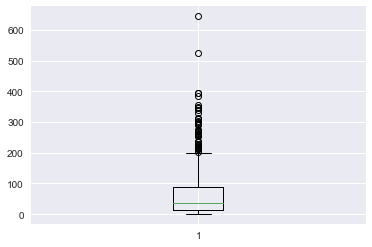

In [89]:
#data analysis
#boxplot
plt.boxplot(df2.Aboard)

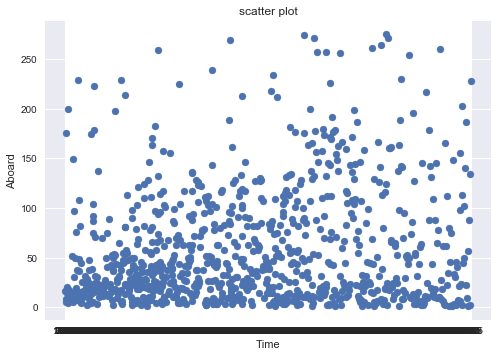

In [63]:
#data visualization using scatter plot
plt.title("scatter plot")
plt.xlabel("Time")
plt.ylabel("Aboard")
plt.style.use("seaborn")
plt.scatter(df3.Time,df3.Aboard)

#data analysis through formulation of questions
#question 1:the highest number of fatalities?
#question 2:the highest aboard?









In [74]:
#1
df3["Fatalities"].max()

271.0

In [81]:
#2
df3["Aboard"].max()

275.0